# Lab 2

Noah Kim 
Section AC

In [19]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('font', size=22)
matplotlib.rc('figure', figsize=(18, 10))
import numpy as np
import pandas as pd
from scipy import stats, signal

# Problem 1)

In lecture and homework we explored how the convolution can be used to calculate the probability of a sum or average. For this problem we are going to imagine that we are looking for gamma-ray sources (e.g. with the Fermi telescope). In this kind of telescope there is a background of cosmic-rays (electrons and protons, mostly) that provides a discrete noise term across the sky that precisely follows a Poisson distribution. To detect a gamma-ray source, you need to ask what is the probability that the cosmic-ray background would have given you a measurement as signal-like or more than the signal that you received.

To set up the problem, assume in 1 day the average cosmic-ray background is some number X (pick someting btwn 0.5 and 10, with different values for you and your lab partner); and the average number of gamma-rays emitted by your hypothetical source is Y (pick something larger than X).

A) Show how the probability distribution of the background changes as you integrate (sum) for more days.

B) Show that after 5 days, the summed probability distribution is still a Poisson distribution. Explain why this makes sense from a mathematical and conceptual point of view.

C) Show how the probability distribution evolves as you average days. Calculate for many different ranges of days, and explore the shape of the distribution as the number of days becomes larger. Discuss this in relation to both B) and the central limit theoem.

D) Pick some number of days N, and assume you saw Y*N gamma rays from your source. Calculate the 'sigma' of your observation. [In reality the number of gamma-rays seen from a source will also fluctuate, but we're going to ignore that complication for a couple of labs.]

To start, I will assume 1 day the average cosmic-ray background is 5.5 and the average number of gamma-rays is 8. 

In [20]:
avg_cosmic_ray = 5.5
avg_gamma_ray = 8

Under the assumption that the cosmic-rays is Poisson distributed, we can plot the cosmic rays probability mass function.

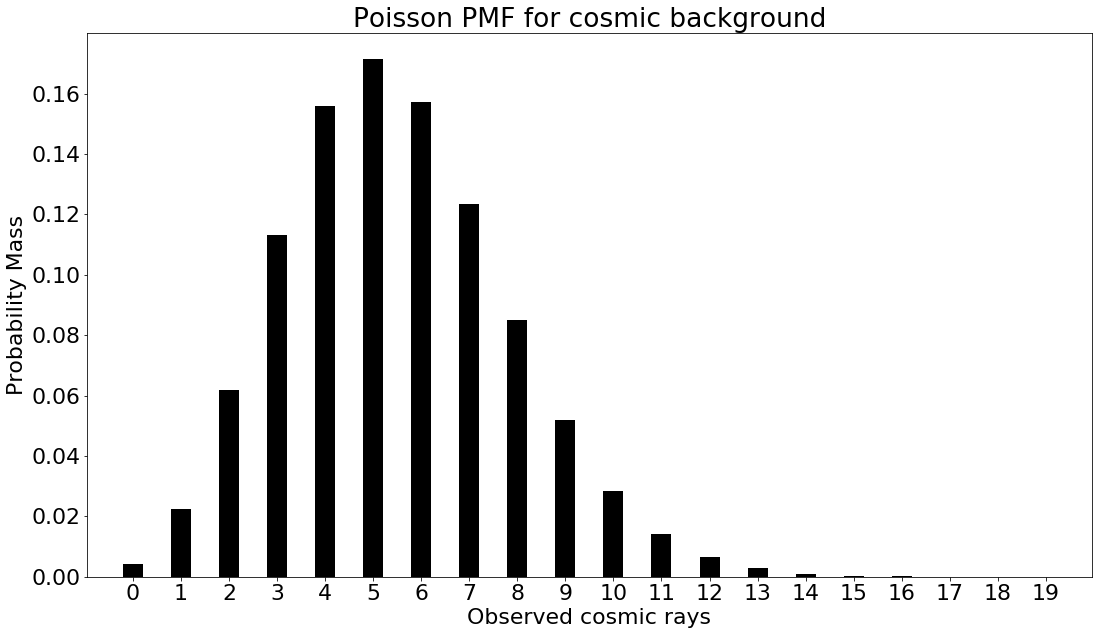

In [21]:
x = np.arange(0, 20)
pmf = stats.poisson.pmf(x, avg_cosmic_ray)
plt.vlines(x,0,pmf, linewidth=20)
plt.title("Poisson PMF for cosmic background")
plt.xlabel("Observed cosmic rays")
plt.ylabel("Probability Mass")
plt.xticks(x)
plt.ylim(0, None);


To show how the distribution changes as we integrate over a period of several days, I will plot the corresponding expected number of cosmic rays seen after $n$ days. Using the SciPy convolve function. I will convolve the distribution with itself for the given number of additional days.

In [78]:
def plot_sum(k, n, *args, **kwargs):
    new_pmf = k
    for i in range(n):
        new_pmf = signal.fftconvolve(new_pmf, k)
    plt.vlines(range(len(new_pmf)), 0, new_pmf, *args, **kwargs)
    plt.xlim(0, None)
    plt.ylim(0, None)

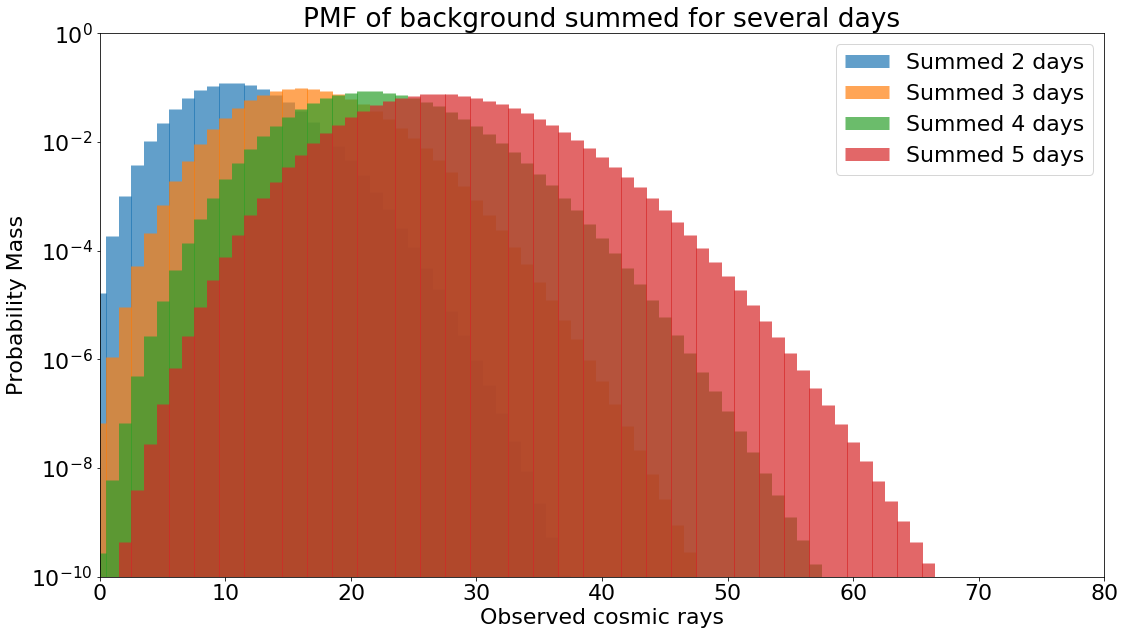

In [79]:
for i in range(1, 5):
    plot_sum(pmf, i, linewidth=13, color=f"C{i - 1}", alpha=0.7)
plt.title("PMF of background summed for several days")
plt.xlabel("Observed cosmic rays")
plt.ylabel("Probability Mass")
plt.legend([f"Summed {i + 1} days" for i in range(1, 5)])
plt.yscale('log')
plt.xlim(0, 80)
plt.ylim(1e-10, 1);

Integrating the PMF of the Poisson distribution of the sum of cosmic rays, the distribution still maintains the "tail" associated with a Poisson distribution. 

Plotting the averages 

In [80]:
def plot_averages(k, n, *args, **kwargs):
    new_pmf = k
    for i in range(n):
        new_pmf = signal.fftconvolve(new_pmf, k)
    plt.vlines(np.arange(len(new_pmf)) / (n + 1), 0, new_pmf, *args, **kwargs)
    plt.xlim(0, None)
    plt.ylim(0, None)

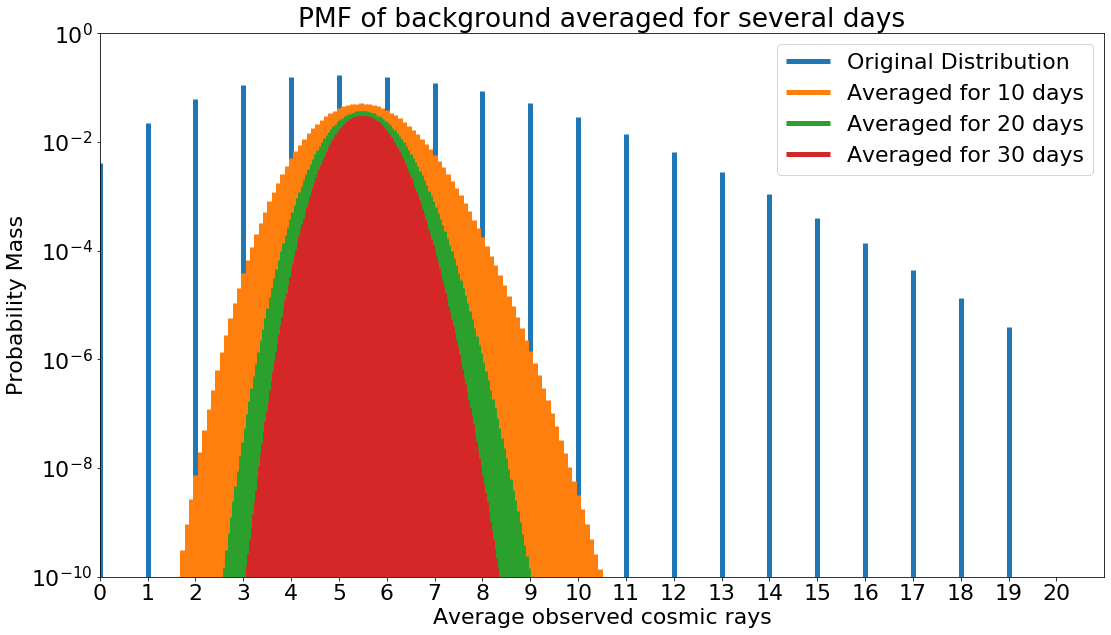

In [81]:
days = [0, 10, 20, 30]
for i in days:
    plot_averages(pmf, i, linewidth=5, color=f"C{i // 10}")
plt.title("PMF of background averaged for several days")
plt.xlabel("Average observed cosmic rays")
plt.ylabel("Probability Mass")
plt.legend(['Original Distribution', *[f"Averaged for {n} days" for n in days[1:]]])
plt.yscale('log')
plt.xticks(range(0, 21))
plt.xlim(0, 21)
plt.ylim(1e-10, 1);

As _n_ increases, the variance shrinks and converges closer to the mean and looks more gaussian the higher _n_ is. 

In [97]:
prob = 1 - stats.poisson(45).cdf(59)
print(prob)

0.018651134648575485


In [99]:
print(stats.norm.ppf(1 - prob))

2.082440314519667


# Problem 2

I chose Rayleigh's distribution to describe the background over the observing interval. 

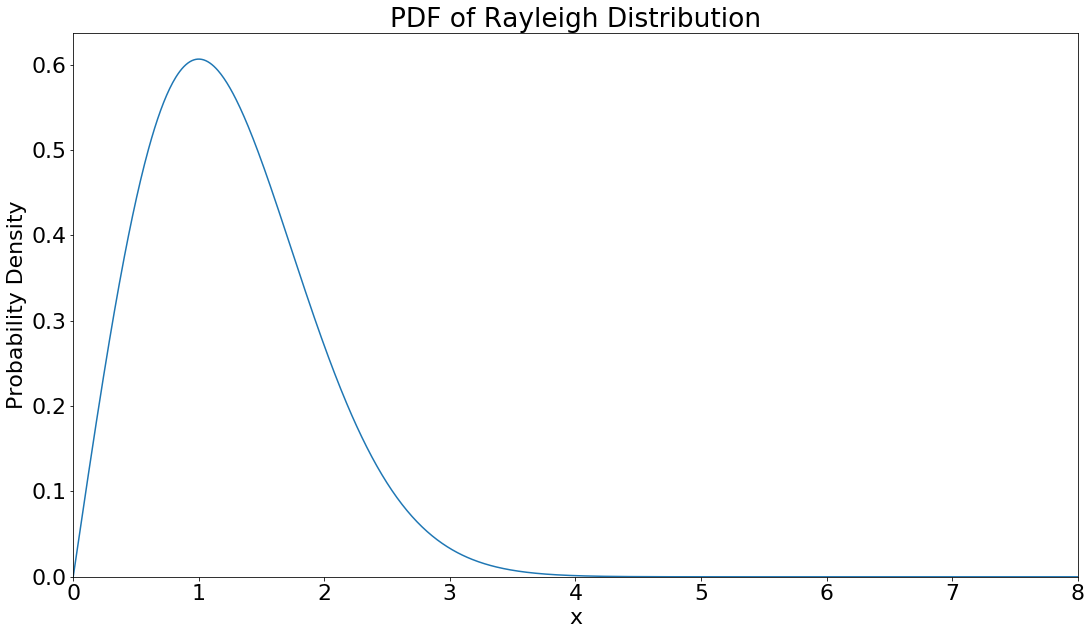

In [60]:
x = np.linspace(0,8,1000)
rayleigh = stats.rayleigh.pdf(x, scale=1)
plt.plot(x,rayleigh);
plt.title("PDF of Rayleigh Distribution");
plt.xlabel("x");
plt.ylabel("Probability Density");
plt.xlim(0, 8)
plt.xticks(range(0, 9))
plt.ylim(0, None);


In [110]:
def plot_average_rayleigh(x, pdf, n):
    new_ray = pdf
    for i in range(n):
        new_ray = np.convolve(new_ray, pdf)
    plt.plot(np.linspace(x[0], x[-1] , len(new_ray)), new_ray)
    plt.xlim(x[0], x[-1])

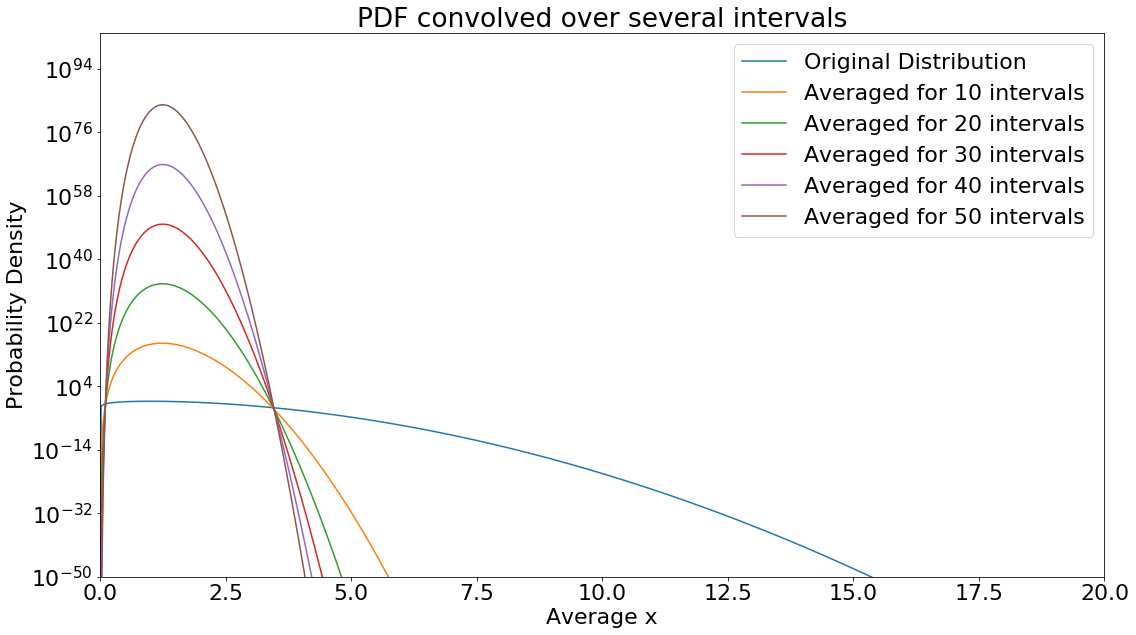

In [111]:
ray = stats.rayleigh.pdf(x)
nums = [0, 10, 20, 30, 40, 50]
for i in nums:
    plot_average_rayleigh(x, ray, i)
plt.title("PDF convolved over several intervals")
plt.xlabel("Average x")
plt.ylabel("Probability Density")
plt.yscale('log')
plt.ylim(1e-50, None);
plt.legend(['Original Distribution', *[f"Averaged for {n} intervals" for n in nums[1:]]], loc="best");


# Problem 3

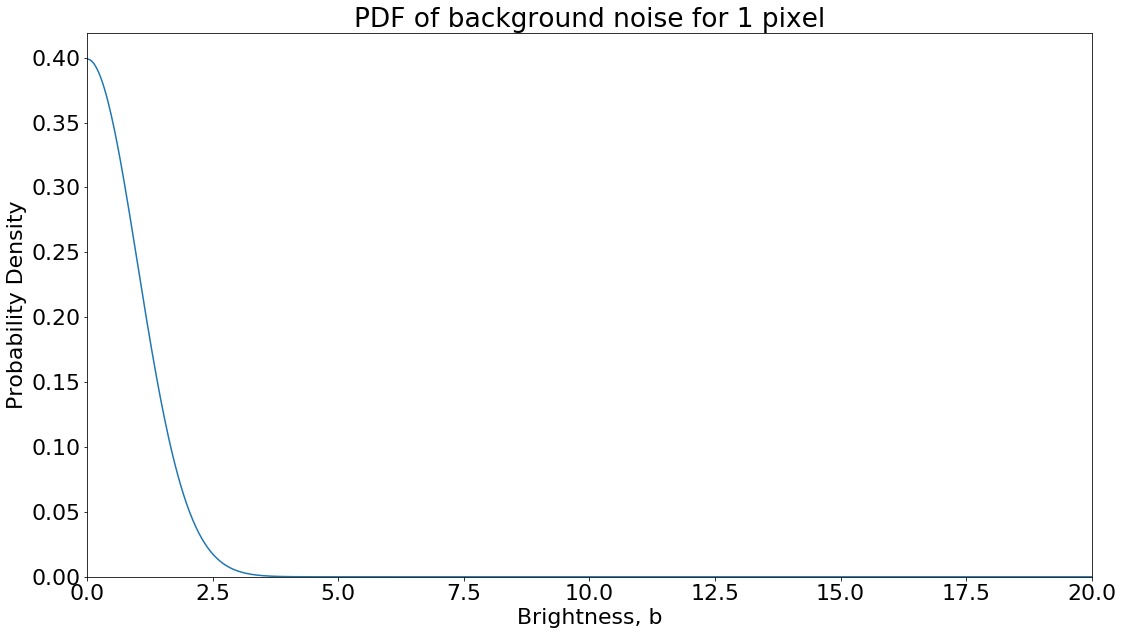

In [107]:
dist = stats.norm(scale=1)
x = np.linspace(0, 20, 1000)
plt.title("PDF of background noise for 1 pixel")
plt.xlabel("Brightness, b")
plt.ylabel("Probability Density")
plt.plot(x, dist.pdf(x))
plt.xlim(0, 20)
plt.ylim(0, None);

First find probability, then convert to sigma